In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [2]:
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data = data[['Close']]
data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288584
2015-01-05,23.604330
2015-01-06,23.606560
2015-01-07,23.937567
2015-01-08,24.857309


# Step 4: Normalize Data
We normalize prices for better LSTM performance.

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 5: Prepare Dataset for LSTM
We will create sequences of 60 days of stock prices to predict the next day.

In [4]:
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


 # Step 6: Build the LSTM Model

In [5]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


C:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0335
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.1720e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 3.9006e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.4289e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 3.4995e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 3.3838e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 3.1045e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.8742e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 2.9906e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.9560e-04


# Step 7: Test the Model
We'll test it on 2023–2024 data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


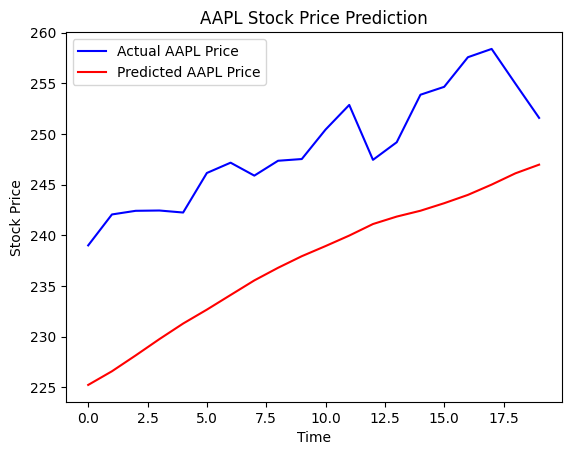

In [6]:
test_data = scaled_data[-80:]
X_test = []
for i in range(60, 80):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Actual data
real_data = data[-20:].values

plt.plot(real_data, color='blue', label='Actual AAPL Price')
plt.plot(predicted_price, color='red', label='Predicted AAPL Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
